이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter10_dl-for-timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 시계열을 위한 딥러닝

## 다양한 종류의 시계열 작업

## 기온 예측 문제

In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2024-05-07 01:07:35--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.41.248, 52.216.57.160, 52.217.70.38, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.41.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  38.7MB/s    in 0.3s    

2024-05-07 01:07:35 (38.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


**예나 날씨 데이터셋 조사하기**

In [3]:
!head jena_climate_2009_2016.csv

"Date Time","p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)","VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)"
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,

In [2]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [6]:
lines[2:3]

['01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60']

**데이터 파싱**

In [9]:
len(lines)

420451

In [7]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

In [13]:
temperature

array([-8.02, -8.41, -8.51, ..., -3.16, -4.23, -4.82])

**전체 기온을 그래프로 그리기**

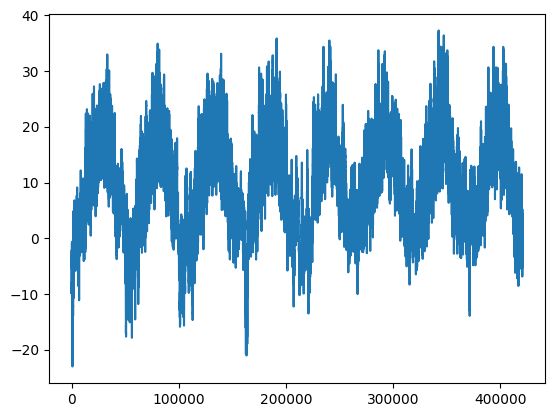

In [8]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.show()

**처음 10일간의 기온을 그래프로 그리기**

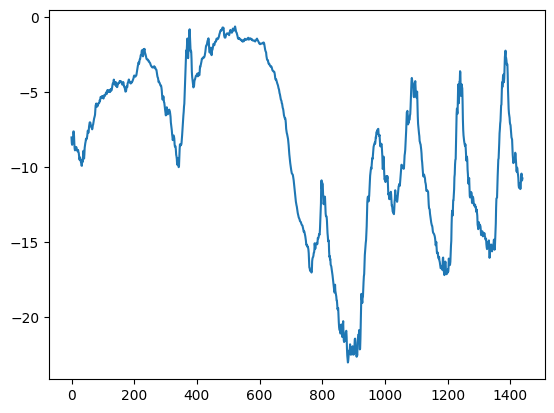

In [ ]:
plt.plot(range(1440), temperature[:1440])
plt.show()

**각 분할에 사용할 샘플 수 계산하기**

In [15]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


### 데이터 준비

**데이터 정규화**

In [16]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [17]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


**훈련, 검증, 테스트 데이터셋 만들기**

In [27]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [24]:
# 동영상 41분 확인
int_sequence = np.arange(10,4204510,10)
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset2 = keras.utils.timeseries_dataset_from_array(
    int_sequence[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

In [25]:
for samples, targets in train_dataset2:
    print("샘플 크기:", samples)
    print("타깃 크기:", targets)
    break

샘플 크기: tf.Tensor(
[[1856360 1856420 1856480 ... 1863380 1863440 1863500]
 [1999560 1999620 1999680 ... 2006580 2006640 2006700]
 [1808240 1808300 1808360 ... 1815260 1815320 1815380]
 ...
 [ 626210  626270  626330 ...  633230  633290  633350]
 [2088530 2088590 2088650 ... 2095550 2095610 2095670]
 [  12870   12930   12990 ...   19890   19950   20010]], shape=(256, 120), dtype=int64)
타깃 크기: tf.Tensor(
[ 14.57  10.23  14.48  11.1    5.27  15.52  17.95   4.19  12.64  17.4
   4.54   0.35   2.1    6.53   9.14  15.87  12.99  17.58  19.25   5.97
   8.09  21.66  -0.22  -6.33  18.05  21.48   1.62  10.82   7.41 -11.67
  14.23   8.91  18.69  12.03  -6.64  -5.52   1.92  13.13  -4.86   0.81
   6.07   4.65  13.3   20.32  11.77  -1.02  -1.52  -6.12   2.27   0.05
  10.19  13.24   6.72  22.32  18.96  -0.33  13.12  13.61  -0.68   8.74
   8.37   7.04  -2.52  11.81   7.66  -0.76  -3.5    0.66  23.95  19.68
  20.54  14.23  11.72   6.55  18.77  16.11  12.24 -16.92  -5.13   7.48
   2.33  13.25  11.75  -0.56 

**훈련 데이터셋의 배치 크기 확인하기**

In [26]:
for samples, targets in train_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break

샘플 크기: (256, 120)
타깃 크기: (256,)


### 상식 수준의 기준점

**상식적인 기준 모델의 MAE 계산하기**

In [28]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"검증 MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"테스트 MAE: {evaluate_naive_method(test_dataset):.2f}")

검증 MAE: 2.44
테스트 MAE: 2.62


### 기본적인 머신 러닝 모델 시도해 보기

**밀집 연결 모델 훈련하고 평가하기**

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.h5",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.h5")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 37s 42ms/step - loss: 12.8369 - mae: 2.7682 - val_loss: 14.5415 - val_mae: 3.0150
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


819/819 [==============================] - 37s 45ms/step - loss: 9.1880 - mae: 2.3850 - val_loss: 12.9917 - val_mae: 2.8774
Epoch 3/10
819/819 [==============================] - 45s 55ms/step - loss: 8.4323 - mae: 2.2864 - val_loss: 11.9060 - val_mae: 2.7342
Epoch 4/10
819/819 [==============================] - 45s 55ms/step - loss: 7.8801 - mae: 2.2135 - val_loss: 10.6964 - val_mae: 2.5922
Epoch 5/10
819/819 [==============================] - 45s 55ms/step - loss: 7.5623 - mae: 2.1698 - val_loss: 12.9052 - val_mae: 2.8516
Epoch 6/10
819/819 [==============================] - 35s 43ms/step - loss: 7.3197 - mae: 2.1365 - val_loss: 11.1764 - val_mae: 2.6451
Epoch 7/10
819/819 [==============================] - 34s 42ms/step - loss: 7.0964 - mae: 2.1046 - val_loss: 11.3059 - val_mae: 2.6720
Epoch 8/10
819/819 [==============================] - 35s 43ms/step - loss: 6.9356 - mae: 2.0800 - val_loss: 15.3905 - val_mae: 3.1178
Epoch 9/10
819/819 [==============================] - 45s 54ms/ste

**결과 그래프 그리기**

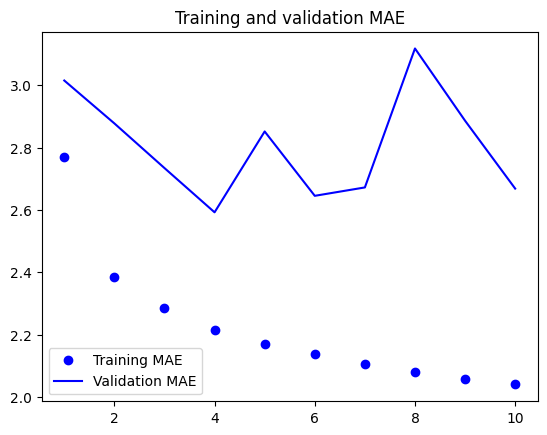

In [30]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 1D 합성곱 모델 시도해 보기

In [31]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.h5",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.h5")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 40s 45ms/step - loss: 21.1255 - mae: 3.6151 - val_loss: 17.0706 - val_mae: 3.2486
Epoch 2/10
819/819 [==============================] - 36s 44ms/step - loss: 15.1195 - mae: 3.0895 - val_loss: 17.0308 - val_mae: 3.2368
Epoch 3/10
819/819 [==============================] - 46s 56ms/step - loss: 13.6872 - mae: 2.9382 - val_loss: 13.8155 - val_mae: 2.9438
Epoch 4/10
819/819 [==============================] - 37s 45ms/step - loss: 12.7802 - mae: 2.8363 - val_loss: 14.1435 - val_mae: 2.9517
Epoch 5/10
819/819 [==============================] - 46s 55ms/step - loss: 12.2123 - mae: 2.7709 - val_loss: 14.1591 - val_mae: 2.9730
Epoch 6/10
819/819 [==============================] - 36s 44ms/step - loss: 11.8340 - mae: 2.7276 - val_loss: 15.0973 - val_mae: 3.0457
Epoch 7/10
819/819 [==============================] - 35s 43ms/step - loss: 11.4358 - mae: 2.6804 - val_loss: 12.8642 - val_mae: 2.8239
Epoch 8/10
819/819 [============================

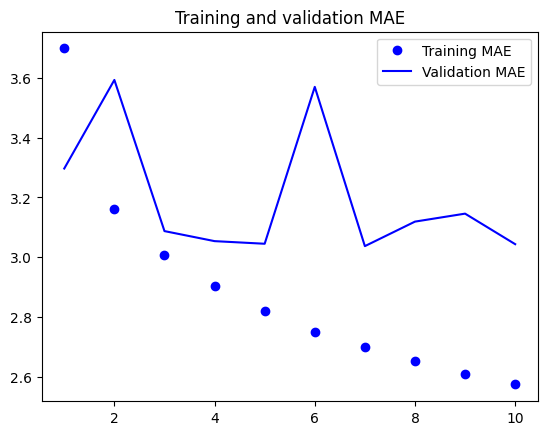

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 첫 번째 순환 신경망

**간단한 LSTM 기반 모델**

In [32]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.h5",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.h5")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 49s 57ms/step - loss: 42.0072 - mae: 4.6927 - val_loss: 12.7964 - val_mae: 2.7033
Epoch 2/10
819/819 [==============================] - 37s 44ms/step - loss: 10.8729 - mae: 2.5631 - val_loss: 9.5713 - val_mae: 2.4142
Epoch 3/10
819/819 [==============================] - 49s 60ms/step - loss: 9.9827 - mae: 2.4614 - val_loss: 9.5475 - val_mae: 2.4051
Epoch 4/10
819/819 [==============================] - 38s 46ms/step - loss: 9.7433 - mae: 2.4324 - val_loss: 9.5334 - val_mae: 2.4066
Epoch 5/10
819/819 [==============================] - 37s 45ms/step - loss: 9.5529 - mae: 2.4081 - val_loss: 9.5801 - val_mae: 2.3992
Epoch 6/10
819/819 [==============================] - 46s 56ms/step - loss: 9.3247 - mae: 2.3804 - val_loss: 10.0959 - val_mae: 2.4620
Epoch 7/10
819/819 [==============================] - 48s 59ms/step - loss: 9.0619 - mae: 2.3479 - val_loss: 9.8008 - val_mae: 2.4329
Epoch 8/10
819/819 [==============================] - 38s 

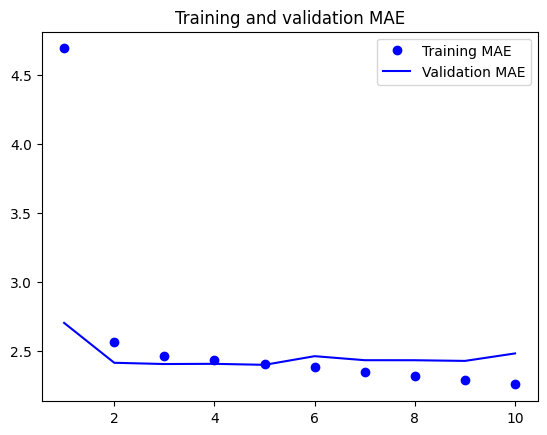

In [33]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 순환 신경망 이해하기

**넘파이로 구현한 간단한 RNN**

In [34]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)

### 케라스의 순환 층

**어떤 길이의 시퀀스도 처리할 수 있는 RNN 층**

In [35]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

**마지막 출력 스텝만 반환하는 RNN 층**

In [36]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)

(None, 16)


**전체 출력 시퀀스를 반환하는 RNN 층**

In [37]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

(None, 120, 16)


**스태킹(stacking) RNN 층**

In [38]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

## 순환 신경망의 고급 사용법

### 과대적합을 감소하기 위해 순환 드롭아웃 사용하기

**드롭아웃 규제를 적용한 LSTM 모델 훈련하고 평가하기**

In [41]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
#x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.h5",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 40s 47ms/step - loss: 28.6631 - mae: 3.9318 - val_loss: 9.8359 - val_mae: 2.4371
Epoch 2/10
819/819 [==============================] - 39s 48ms/step - loss: 14.6376 - mae: 2.9659 - val_loss: 9.3774 - val_mae: 2.3783
Epoch 3/10
819/819 [==============================] - 39s 48ms/step - loss: 13.5000 - mae: 2.8519 - val_loss: 9.2285 - val_mae: 2.3641
Epoch 4/10
819/819 [==============================] - 38s 46ms/step - loss: 12.8634 - mae: 2.7850 - val_loss: 9.2457 - val_mae: 2.3681
Epoch 5/10
819/819 [==============================] - 39s 47ms/step - loss: 12.3575 - mae: 2.7256 - val_loss: 9.1939 - val_mae: 2.3734
Epoch 6/10
819/819 [==============================] - 48s 58ms/step - loss: 11.9687 - mae: 2.6837 - val_loss: 9.7555 - val_mae: 2.4362
Epoch 7/10
819/819 [==============================] - 49s 60ms/step - loss: 11.5365 - mae: 2.6313 - val_loss: 8.9523 - val_mae: 2.3400
Epoch 8/10
819/819 [==============================] - 3

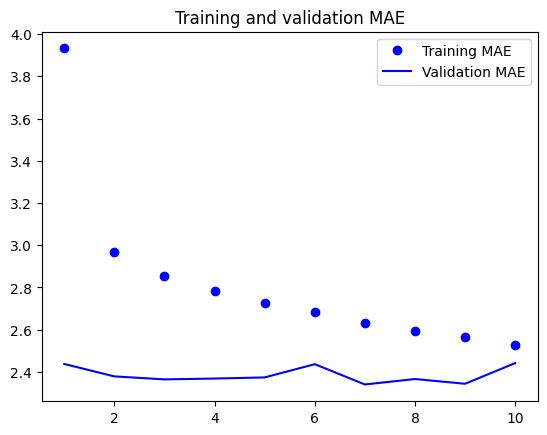

In [42]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [43]:
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)

### 스태킹 순환 층

**드롭아웃 규제와 스태킹을 적용한 GRU 모델을 훈련하고 평가하기**

In [44]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
# x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
# x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.GRU(32, return_sequences=True)(inputs)
x = layers.GRU(32)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.h5",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.h5")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 46s 52ms/step - loss: 24.4799 - mae: 3.6497 - val_loss: 9.3043 - val_mae: 2.3564
Epoch 2/10
819/819 [==============================] - 45s 55ms/step - loss: 13.7068 - mae: 2.8675 - val_loss: 9.2598 - val_mae: 2.3635
Epoch 3/10
819/819 [==============================] - 43s 52ms/step - loss: 12.7756 - mae: 2.7706 - val_loss: 9.0007 - val_mae: 2.3351
Epoch 4/10
819/819 [==============================] - 42s 51ms/step - loss: 12.0432 - mae: 2.6921 - val_loss: 8.9169 - val_mae: 2.3211
Epoch 5/10
819/819 [==============================] - 41s 49ms/step - loss: 11.3386 - mae: 2.6098 - val_loss: 9.1646 - val_mae: 2.3412
Epoch 6/10
819/819 [==============================] - 42s 50ms/step - loss: 10.6969 - mae: 2.5366 - val_loss: 10.2244 - val_mae: 2.4775
Epoch 7/10
819/819 [==============================] - 42s 51ms/step - loss: 10.0256 - mae: 2.4600 - val_loss: 9.3359 - val_mae: 2.3808
Epoch 8/10
819/819 [==============================] - 

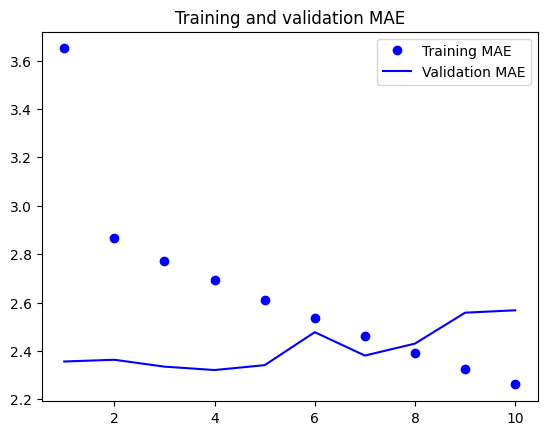

In [45]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 양방향 RNN 사용하기

시퀀스를 거꾸로 뒤집어 LSTM 모델 훈련하기 (책에는 없음)

In [46]:
def train_generator():
    while True:
        for samples, targets in train_dataset:
            yield samples[:, ::-1, :], targets

def val_generator():
    while True:
        for samples, targets in val_dataset:
            yield samples[:, ::-1, :], targets

train_gen = train_generator()
val_gen = val_generator()

In [47]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
# x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_gen,
                    epochs=10,
                    steps_per_epoch=819,
                    validation_data=val_gen,
                    validation_steps=410)

Epoch 1/10
819/819 [==============================] - 53s 63ms/step - loss: 31.5106 - mae: 4.3007 - val_loss: 17.7024 - val_mae: 3.2935
Epoch 2/10
819/819 [==============================] - 81s 99ms/step - loss: 21.5372 - mae: 3.6410 - val_loss: 17.8061 - val_mae: 3.3044
Epoch 3/10
819/819 [==============================] - 41s 50ms/step - loss: 20.2656 - mae: 3.5186 - val_loss: 17.6034 - val_mae: 3.2640
Epoch 4/10
819/819 [==============================] - 51s 62ms/step - loss: 19.3539 - mae: 3.4278 - val_loss: 17.6462 - val_mae: 3.2459
Epoch 5/10
819/819 [==============================] - 68s 60ms/step - loss: 18.4288 - mae: 3.3399 - val_loss: 15.4499 - val_mae: 3.0832
Epoch 6/10
819/819 [==============================] - 110s 135ms/step - loss: 16.0909 - mae: 3.1380 - val_loss: 13.0171 - val_mae: 2.8117
Epoch 7/10
819/819 [==============================] - 39s 47ms/step - loss: 14.8656 - mae: 3.0158 - val_loss: 13.2526 - val_mae: 2.7955
Epoch 8/10
819/819 [==========================

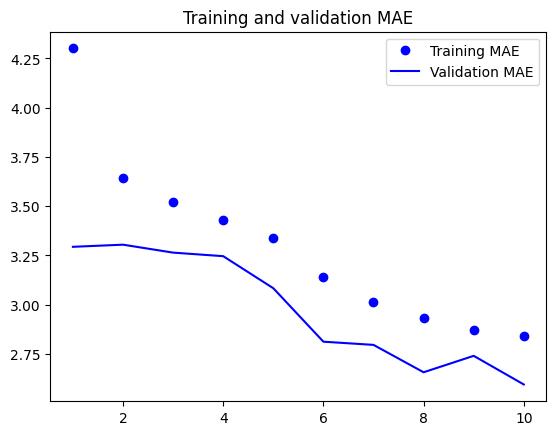

In [48]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

**양방향 LSTM 모델 훈련하고 평가하기**

In [49]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

Epoch 1/10
819/819 [==============================] - 47s 52ms/step - loss: 26.3892 - mae: 3.6898 - val_loss: 10.1348 - val_mae: 2.4602
Epoch 2/10
819/819 [==============================] - 43s 53ms/step - loss: 9.4696 - mae: 2.3929 - val_loss: 9.6671 - val_mae: 2.4108
Epoch 3/10
819/819 [==============================] - 46s 55ms/step - loss: 8.6498 - mae: 2.2898 - val_loss: 9.5120 - val_mae: 2.3850
Epoch 4/10
819/819 [==============================] - 42s 51ms/step - loss: 8.0722 - mae: 2.2142 - val_loss: 10.0546 - val_mae: 2.4427
Epoch 5/10
819/819 [==============================] - 43s 52ms/step - loss: 7.6756 - mae: 2.1607 - val_loss: 10.3919 - val_mae: 2.4889
Epoch 6/10
819/819 [==============================] - 41s 50ms/step - loss: 7.4260 - mae: 2.1268 - val_loss: 9.8676 - val_mae: 2.4310
Epoch 7/10
819/819 [==============================] - 44s 54ms/step - loss: 7.1819 - mae: 2.0915 - val_loss: 10.4692 - val_mae: 2.5034
Epoch 8/10
819/819 [==============================] - 42s

### 더 나아가서

## 요약